In [1]:
#IMPORT LIBRARY
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

#SESSION START
spark = SparkSession.builder \
.master("local") \
.appName("Exercise1") \
.getOrCreate()

In [2]:
#LOAD DATA FRAME LOCALLY
df = spark.read.csv("exampleData.csv", header=True, inferSchema=True)
df.show(vertical=False)
df.printSchema()


+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+
|_c0|         dateTime|indicator_rain|precipitation|indicator_temp|air_temperature|indicator_wetb|wetb|dewpt|vappr|relative_humidity|   msl|indicator_wdsp|wind_speed|indicator_wddir|wind_from_direction|
+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+
| 14|01-jan-1990 00:00|             0|          0.3|             0|            9.1|             0| 9.0|  8.9| 11.4|               99|1006.7|             2|         7|              2|                190|
| 15|01-jan-1990 01:00|             0|          0.2|             0|            8.2|             0| 7.4|  6.4|  9.7|               89|1006.7|             2|         5|              2|      

In [3]:
#LOAD FROM URL
#url 

In [4]:
#SAVE DATA FRAME
#df.write.csv("out.csv", header=True)

In [5]:
#DATA MANUPULATION
from pyspark.sql import functions as F #- we load the libraries required here
df.select(F.col("wetb"))

#df.collect()[3]

df.select("wetb").count()
df.select("wetb").distinct() #Allows you to select only distinct values
df.select("wetb").distinct().count() #count of distinct values

df.selectExpr("wetb * 5 as newColumn", "round(air_temperature) as roundedTemper").show()

df.selectExpr("air_temperature  as air_temperature", "round(air_temperature) as roundedTemper").show()
df0 = df.selectExpr("wetb as wetbulb").show()

DataFrame[wetb: string]

245088

DataFrame[wetb: string]

264

+---------+-------------+
|newColumn|roundedTemper|
+---------+-------------+
|     45.0|          9.0|
|     37.0|          8.0|
|     37.0|          8.0|
|     37.5|          8.0|
|     36.5|          8.0|
|     35.0|          8.0|
|     34.0|          7.0|
|     30.0|          7.0|
|     31.0|          7.0|
|     30.5|          7.0|
|     30.5|          8.0|
|     33.0|          8.0|
|     39.0|         10.0|
|     35.0|          9.0|
|     40.0|         10.0|
|     37.5|          9.0|
|     35.5|          9.0|
|     33.0|          8.0|
|     35.5|          9.0|
|     34.0|          8.0|
+---------+-------------+
only showing top 20 rows

+---------------+-------------+
|air_temperature|roundedTemper|
+---------------+-------------+
|            9.1|          9.0|
|            8.2|          8.0|
|            7.9|          8.0|
|            7.8|          8.0|
|            8.0|          8.0|
|            7.6|          8.0|
|            7.4|          7.0|
|            6.8|          7.0

In [6]:
df.drop("_c0")

df1 = df.selectExpr("cast(air_temperature as float) air_temperature")
df1.dtypes

df1.filter((F.col('air_temperature')<5))  #.show()

DataFrame[dateTime: string, indicator_rain: int, precipitation: string, indicator_temp: int, air_temperature: string, indicator_wetb: int, wetb: string, dewpt: string, vappr: string, relative_humidity: string, msl: string, indicator_wdsp: int, wind_speed: string, indicator_wddir: int, wind_from_direction: int]

[('air_temperature', 'float')]

DataFrame[air_temperature: float]

In [7]:
df_u = df.select("wetb")
df_i = df.select("air_temperature")
unionDF= df_u.union(df_i)#.show() 

df.groupBy('precipitation').count().orderBy('count',
ascending=False)#.show()

df.registerTempTable("example")  #TEMP TABLE
pr = spark.sql("Select air_temperature, " + 
               "count(air_temperature) AS total_freq, " +
               "count(distinct air_temperature) AS unique_air_temp, " +
               "count(wetb) AS wetb_freq, " +
               "count(distinct wetb) AS unique_wetb " +
               "FROM example GROUP BY air_temperature")  #.show()
#pr.show()

DataFrame[precipitation: string, count: bigint]

/usr/local/spark/python/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


<AxesSubplot:xlabel='precipitation', ylabel='air_temperature'>

<AxesSubplot:xlabel='air_temperature', ylabel='wetb'>

<AxesSubplot:xlabel='air_temperature', ylabel='relative_humidity'>

<AxesSubplot:xlabel='air_temperature', ylabel='wind_speed'>

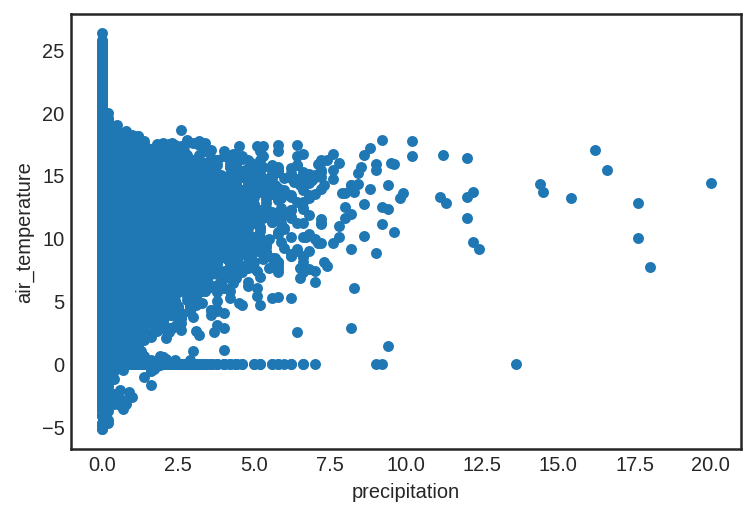

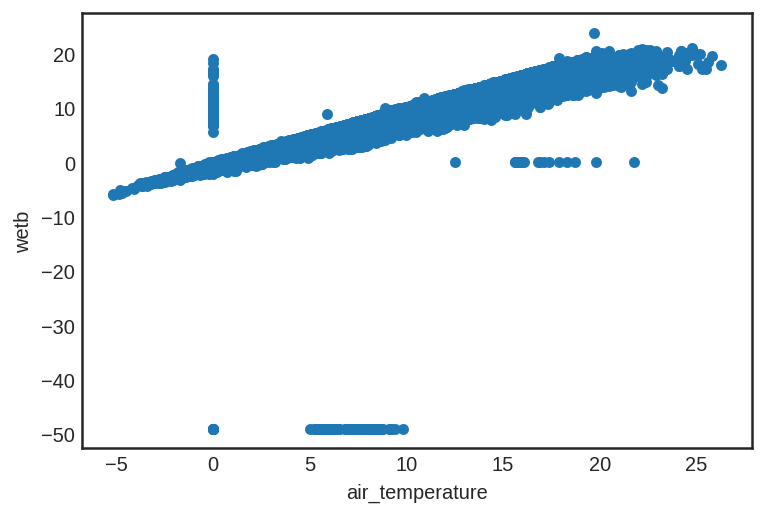

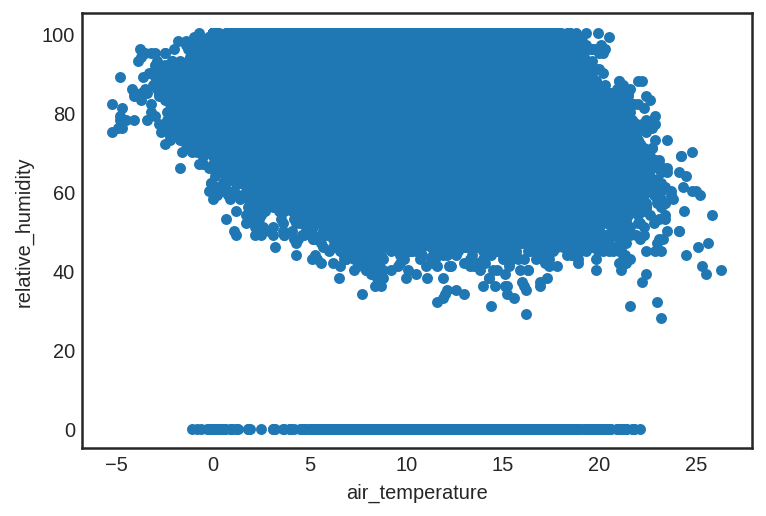

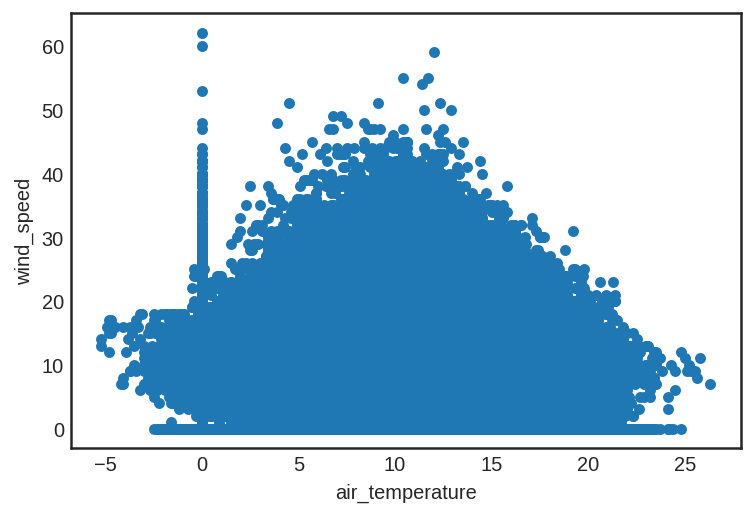

In [21]:
#VISUALIZATION

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.style.use('seaborn-white')
dff = df.toPandas()
params = {'legend.fontsize': 'large',
'figure.figsize': (15, 9),
'axes.labelsize': 'x-large',
'axes.titlesize':'x-large',
'xtick.labelsize':'large',
'ytick.labelsize':'large'} 

#CONVERT TO NUMERIC


#dff.plot(kind='scatter',x='precipitation',y='air_temperature')
#plt.savefig('plot_incorrect.png',dpi=300)

#This will most likely give a type error because of dtype object, 
#you can use the following code to convert object data to numerical type.
#This code should be called before the plot line above.

dff['precipitation'] = pd.to_numeric(dff.precipitation,errors='coerce')
dff['air_temperature'] = pd.to_numeric(dff.air_temperature,errors='coerce')
dff.plot(kind='scatter',x='precipitation',y='air_temperature')
plt.savefig('plot_TempVsPrec.png',dpi=300)

dff['air_temperature'] = pd.to_numeric(dff.air_temperature,errors='coerce')
dff['wetb'] = pd.to_numeric(dff.wetb,errors='coerce')
dff.plot(kind='scatter',x='air_temperature',y='wetb')
plt.savefig('fig_temp_vs_wetb.png',dpi=300)

dff['air_temperature'] = pd.to_numeric(dff.air_temperature,errors='coerce')
dff['relative_humidity'] = pd.to_numeric(dff.relative_humidity,errors='coerce')
dff.plot(kind='scatter',x='air_temperature',y='relative_humidity')
plt.savefig('plot_TempVsHumidity.png',dpi=300)


dff['air_temperature'] = pd.to_numeric(dff.air_temperature,errors='coerce')
dff['wind_speed'] = pd.to_numeric(dff.wind_speed,errors='coerce')
dff.plot(kind='scatter',x='air_temperature',y='wind_speed')
plt.savefig('plot_TempVsWind.png',dpi=300)
#dateTime



<Figure size 1080x648 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average wind_speed')

Text(0.5, 1.0, 'Monthly wind_speed')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

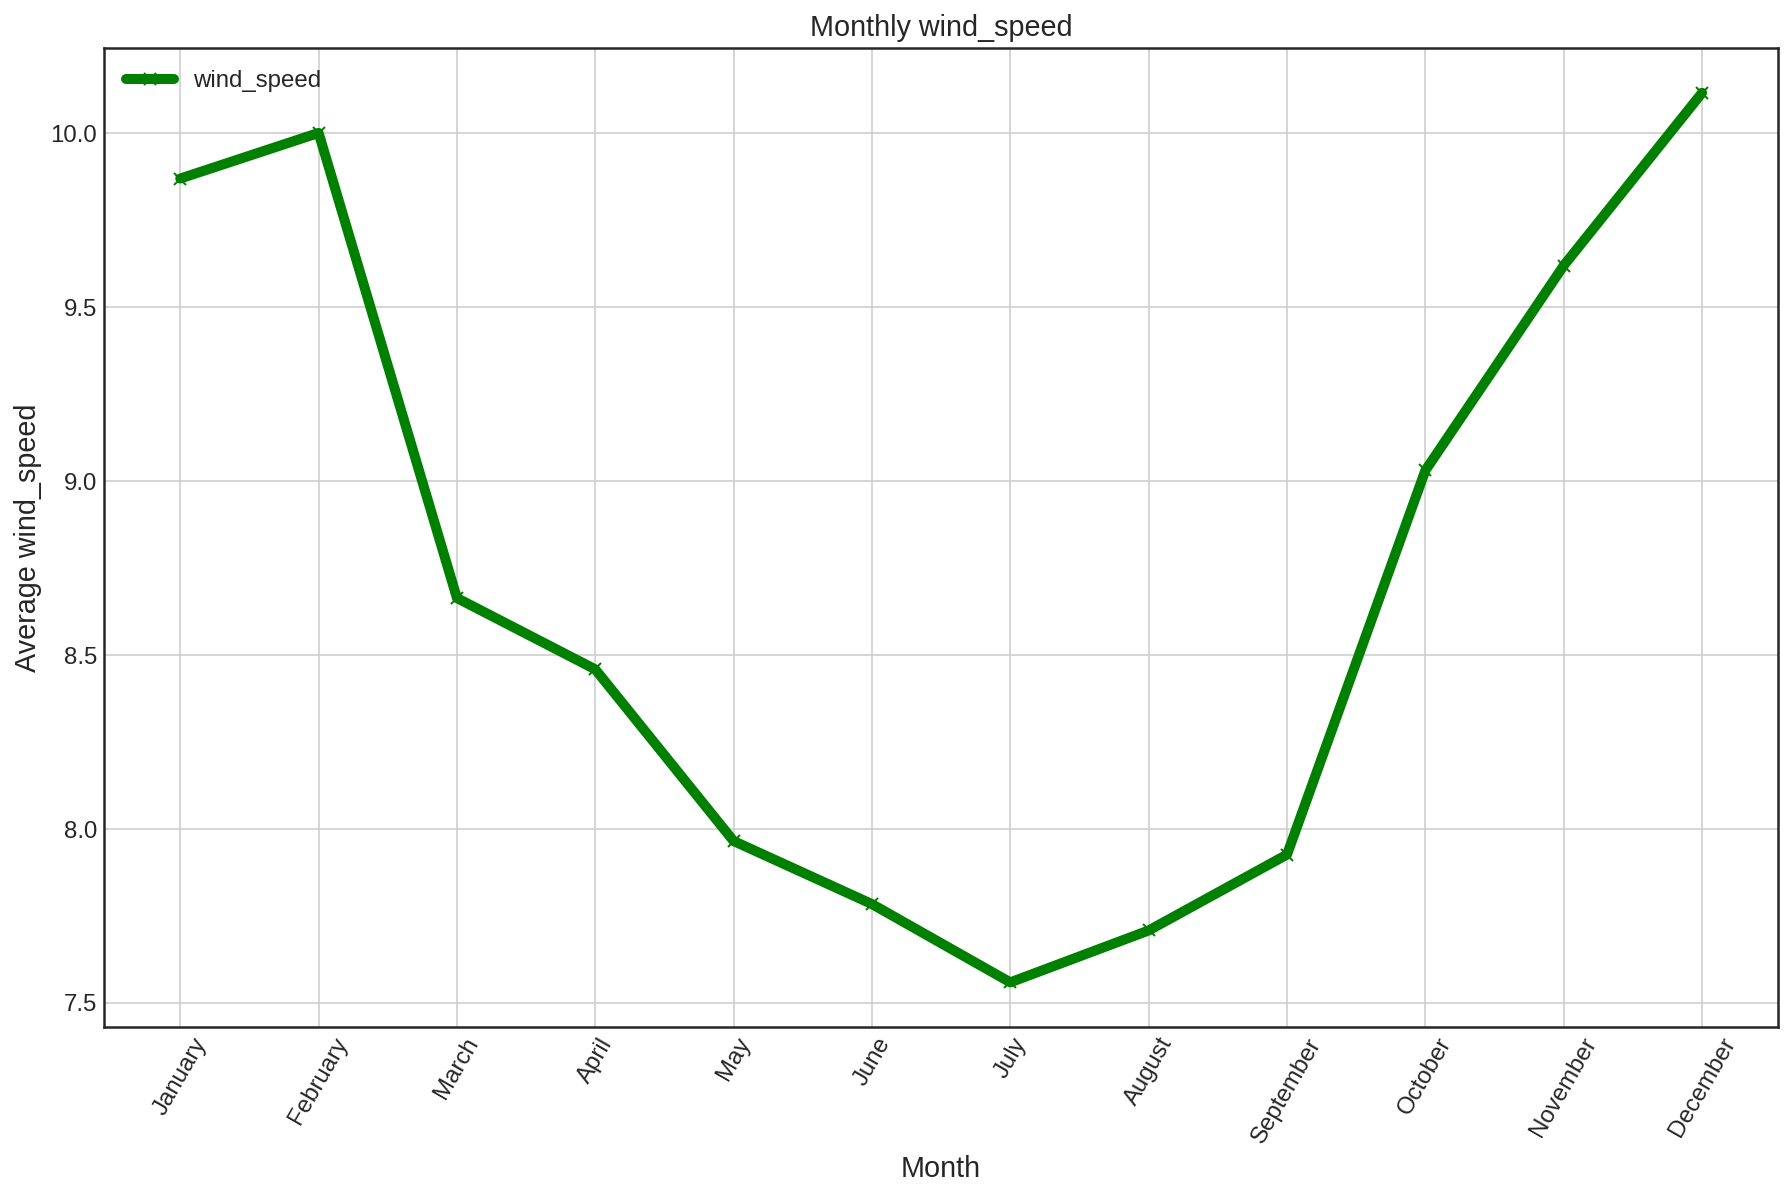

In [26]:
#relative_humidity
#wind_speed

import calendar

dff['dateTime'] = pd.to_datetime(dff['dateTime'])
dff['month'] = dff['dateTime'].dt.month

monthly_precipitation = dff.groupby('month')['precipitation'].mean()
monthly_air_temperature = dff.groupby('month')['air_temperature'].mean()
monthly_relative_humidity = dff.groupby('month')['relative_humidity'].mean()
monthly_wind_speed = dff.groupby('month')['wind_speed'].mean()


month_names = [calendar.month_name[i] for i in monthly_precipitation.index]


plt.figure(figsize=(15, 9))
#plt.bar(month_names, monthly_wind_speed.values, color='green')
plt.plot(month_names, monthly_wind_speed.values, color='green', marker='x', linestyle='-', linewidth=5)

plt.xlabel('Month', fontsize='x-large')
plt.ylabel('Average wind_speed', fontsize='x-large')
plt.title('Monthly wind_speed', fontsize='x-large')
plt.xticks(rotation=60, fontsize='large')
plt.yticks(fontsize='large')
#plt.ylim(0)
plt.legend(['wind_speed'], fontsize='large')
plt.grid(True)
plt.savefig('fig_temp_vs_wind.png', dpi=300)
plt.show()